
Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CustomerID       20 non-null     int64 
 1   Gender           20 non-null     object
 2   SeniorCitizen    20 non-null     int64 
 3   Contract         20 non-null     object
 4   PaymentMethod    20 non-null     object
 5   InternetService  20 non-null     object
 6   State            20 non-null     object
 7   Churn            20 non-null     object
dtypes: int64(2), object(6)
memory usage: 1.4+ KB
None

Sample Data:
   CustomerID  Gender  SeniorCitizen  Contract  PaymentMethod InternetService  \
0           1    Male              1  One year  Bank transfer     Fiber optic   
1           2  Female              0  Two year  Bank transfer     Fiber optic   
2           3    Male              1  Two year   Mailed check             DSL   
3           4    Male              1

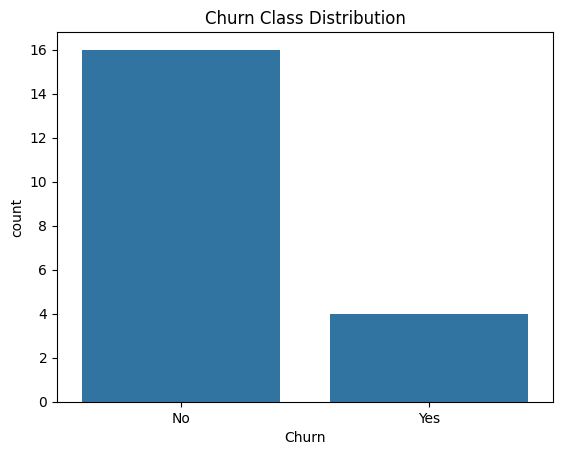


### Analyzing Bias in Gender ###
Churn         No       Yes
Gender                    
Female  1.000000       NaN
Male    0.692308  0.307692


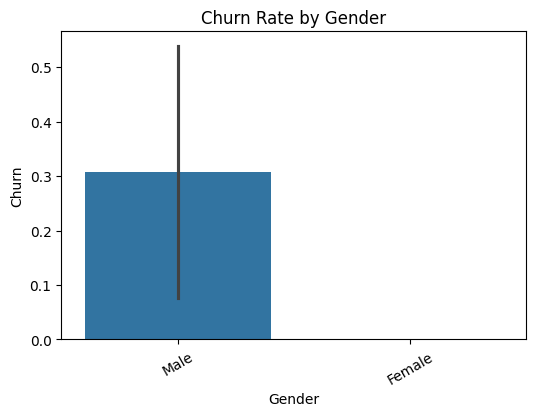


### Analyzing Bias in SeniorCitizen ###
Churn                No       Yes
SeniorCitizen                    
0              0.750000  0.250000
1              0.833333  0.166667


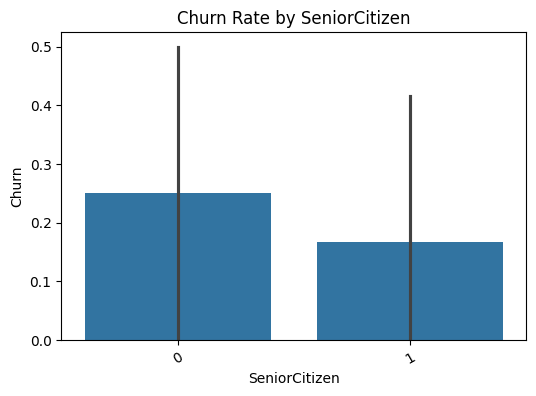


### Analyzing Bias in Contract ###
Churn                 No       Yes
Contract                          
Month-to-month  0.571429  0.428571
One year        1.000000       NaN
Two year        0.857143  0.142857


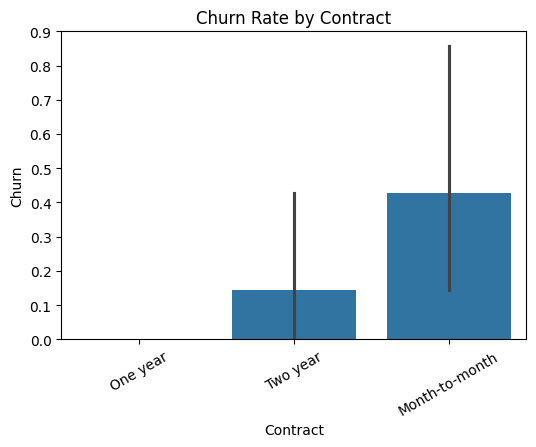


### Analyzing Bias in PaymentMethod ###
Churn                   No       Yes
PaymentMethod                       
Bank transfer     0.750000  0.250000
Credit card       0.750000  0.250000
Electronic check  0.666667  0.333333
Mailed check      1.000000       NaN


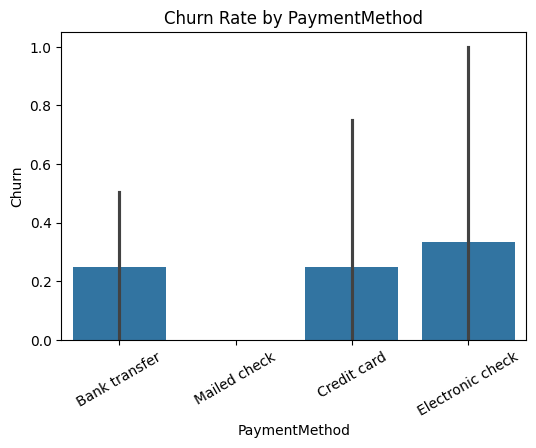


### Analyzing Bias in InternetService ###
Churn               No    Yes
InternetService              
DSL              0.500  0.500
Fiber optic      0.875  0.125
No               1.000    NaN


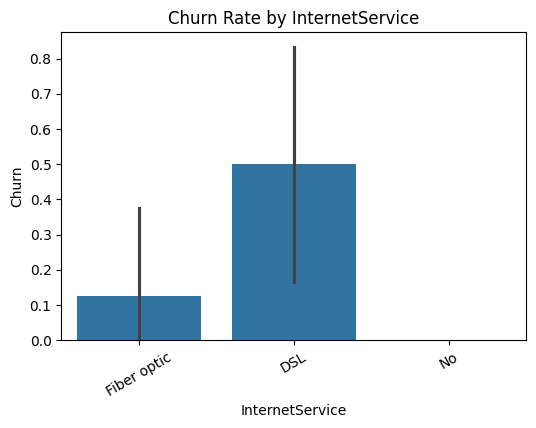


### Analyzing Bias in State ###
Churn          No    Yes
State                   
California  1.000    NaN
Florida     0.800  0.200
New York    0.625  0.375
Texas       1.000    NaN


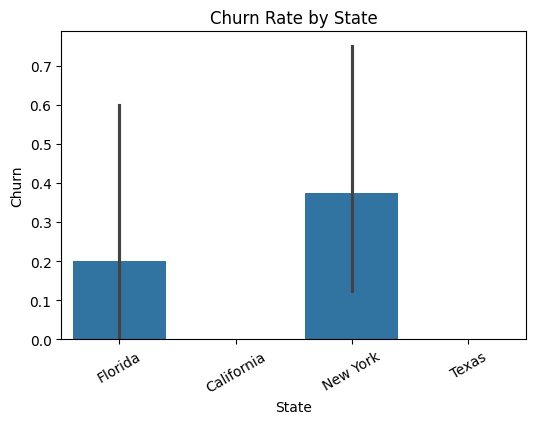


Missing Values per Column:
Series([], dtype: int64)


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data = {
    "CustomerID": range(1, 21),
    "Gender": np.random.choice(["Male", "Female"], size=20),
    "SeniorCitizen": np.random.choice([0, 1], size=20),  # 0 = Not senior, 1 = Senior
    "Contract": np.random.choice(["Month-to-month", "One year", "Two year"], size=20),
    "PaymentMethod": np.random.choice(["Electronic check", "Mailed check", "Bank transfer", "Credit card"], size=20),
    "InternetService": np.random.choice(["DSL", "Fiber optic", "No"], size=20),
    "State": np.random.choice(["California", "Texas", "New York", "Florida"], size=20),
    "Churn": np.random.choice(["Yes", "No"], size=20, p=[0.3, 0.7])  # Imbalanced churn
}
df = pd.DataFrame(data)
print("\nDataset Overview:")
print(df.info())
print("\nSample Data:")
print(df.head())
print("\nChurn Distribution:")
print(df["Churn"].value_counts(normalize=True))
sns.countplot(data=df, x="Churn")
plt.title("Churn Class Distribution")
plt.show()
def detect_bias(column):
    print(f"\n### Analyzing Bias in {column} ###")
    churn_counts = df.groupby(column)["Churn"].value_counts(normalize=True).unstack()
    print(churn_counts)

    plt.figure(figsize=(6, 4))
    sns.barplot(x=column, y=df["Churn"].apply(lambda x: 1 if x == "Yes" else 0), data=df)
    plt.title(f"Churn Rate by {column}")
    plt.xticks(rotation=30)
    plt.show()
bias_columns = ["Gender", "SeniorCitizen", "Contract", "PaymentMethod", "InternetService", "State"]

for col in bias_columns:
    if col in df.columns:
        detect_bias(col)
missing_values = df.isnull().sum()
print("\nMissing Values per Column:")
print(missing_values[missing_values > 0])